# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Loading Dataset

In [2]:
iris = pd.read_csv("Iris.csv")
iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Label Encoding

In [3]:
label = LabelEncoder()
species_trans = label.fit_transform(iris['Species'])
iris['Species'] = species_trans
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Train Test Split

In [4]:
X = iris.drop(['Species'],axis=1)
Y = iris['Species']

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


# KNN

In [6]:

train_data = []
test_data = []


for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, Y_train)
    X_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(Y_train, X_train_pred)
    train_data.append(train_accuracy)
    
    X_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(Y_test, X_test_pred)
    test_data.append(test_accuracy)

    print(f"Train {i}: {train_accuracy}")
    print(f"Test {i}: {test_accuracy}")
    print("-" * 20)



Train 1: 1.0
Test 1: 0.9666666666666667
--------------------
Train 3: 0.95
Test 3: 1.0
--------------------
Train 5: 0.9583333333333334
Test 5: 1.0
--------------------
Train 7: 0.9583333333333334
Test 7: 1.0
--------------------
Train 9: 0.9666666666666667
Test 9: 1.0
--------------------
Train 11: 0.9666666666666667
Test 11: 1.0
--------------------
Train 13: 0.9666666666666667
Test 13: 1.0
--------------------
Train 15: 0.9666666666666667
Test 15: 1.0
--------------------
Train 17: 0.9666666666666667
Test 17: 1.0
--------------------
Train 19: 0.9666666666666667
Test 19: 1.0
--------------------


# Plotting

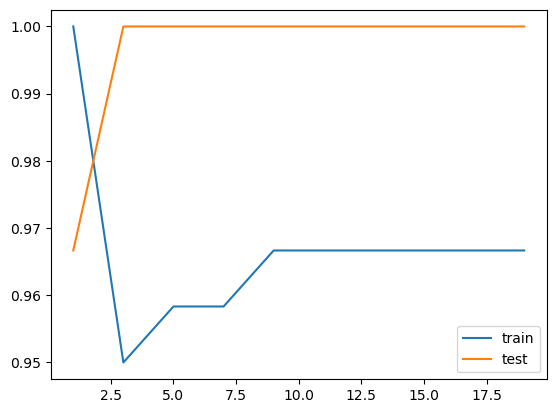

In [7]:
plt.plot(range(1,21,2),train_data)
plt.plot(range(1,21,2),test_data)
plt.legend(['train','test'])
plt.show()


# Classification Report

In [8]:

print("Classification Report - Training Set:")
print(classification_report(Y_train, X_train_pred, target_names=label.classes_))

print("Classification Report - Testing Set:")
print(classification_report(Y_test, X_test_pred, target_names=label.classes_))


Classification Report - Training Set:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.95      0.95        40
 Iris-virginica       0.95      0.95      0.95        40

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Classification Report - Testing Set:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Confusion Matrix

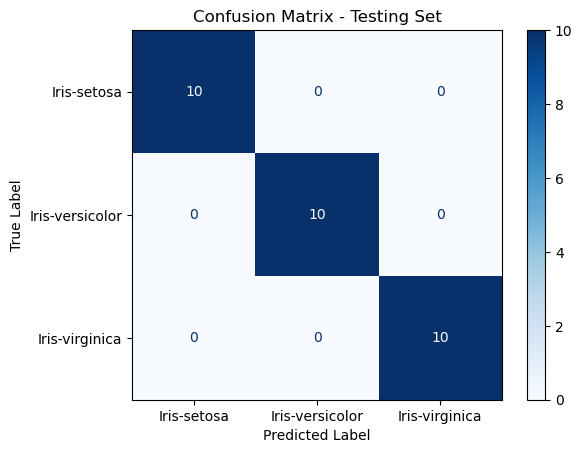

In [9]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=label.classes_)
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Hyperparameter tuning for KNN

In [10]:

param_grid = {
    'n_neighbors': list(range(1, 50)),    
    'weights': ['uniform', 'distance'],    
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}


In [11]:

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=10,                       
    scoring='accuracy',
    n_jobs=-1,                  
    verbose=2                   
)


grid_search.fit(X_train, Y_train)


Fitting 10 folds for each of 294 candidates, totalling 2940 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [12]:

print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")



Best Parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9667


In [13]:

best_knn = grid_search.best_estimator_

X_train_pred_best = best_knn.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:.4f}")

X_test_pred_best = best_knn.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


Train Accuracy with Best Parameters: 0.9667
Test Accuracy with Best Parameters: 1.0000


In [14]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=label.classes_))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=label.classes_))

Classification Report - Training Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.95      0.95        40
 Iris-virginica       0.95      0.95      0.95        40

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Classification Report - Testing Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



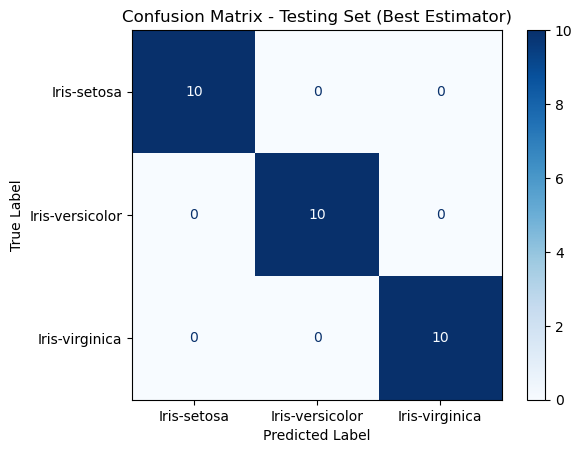

In [15]:

conf_mat_best = confusion_matrix(Y_test, X_test_pred_best)
Matrix_best = ConfusionMatrixDisplay(confusion_matrix=conf_mat_best, display_labels=label.classes_)
Matrix_best.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Testing Set (Best Estimator)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
